<a href="https://colab.research.google.com/github/PRAN20/Histogram-Intensity-Trans/blob/main/Histogram_Intensity_Trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Header Files**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as ps
import cv2
import PIL as Image

# **Function**

**Function To Plot Images**

In [5]:
def plot_image(image_1, image_2, title_1 = "Original", title_2 = "New Image"):
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.title(title_1)
  plt.imshow(image_1,cmap="gray")
  
  plt.subplot(1,2,2)
  plt.title(title_2)
  plt.imshow(image_2,cmap="gray")
  plt.show()

**Function To Plot Histogram**

In [51]:
def plot_hist(old_image, new_image, title_old = "Original", title_new = "New Image"):

  intensity_values=np.array([x for x in range(256)])

  plt.subplot(1, 2, 1)
  plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
  plt.title(title_old)
  plt.xlabel('intensity')

  plt.subplot(1, 2, 2)
  plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
  plt.title(title_new)
  plt.xlabel('intensity')
  plt.show()

# **Test Array**

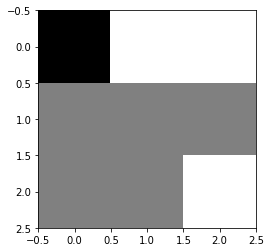

[[0 2 2]
 [1 1 1]
 [1 1 2]]


In [16]:
test_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)

plt.imshow(test_image, cmap = "gray")
plt.show()
print(test_image)

**Plotting Histogram**

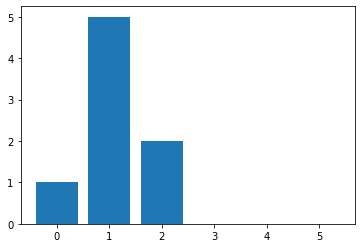

In [19]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

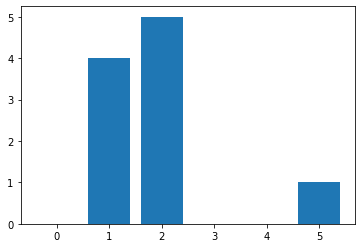

In [20]:
plt.bar([x for x in range(6)],[0,4,5,0,0,1])
plt.show()

# **Gray-Scale Histogram**

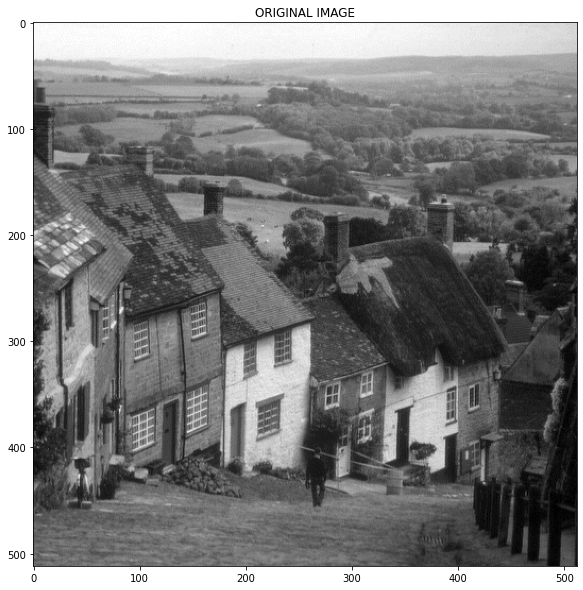

In [21]:
image = cv2.imread('goldhill.bmp', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.title('ORIGINAL IMAGE')
plt.imshow(image, cmap = "gray")
plt.show()

In [26]:
hist = cv2.calcHist([image],[0], None, [256], [0,256])

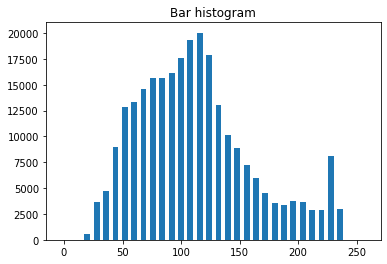

In [29]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

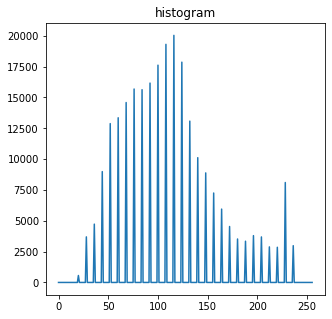

In [32]:
plt.figure(figsize=(5,5))
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

# **Applying a Histogram to all Color Channels**



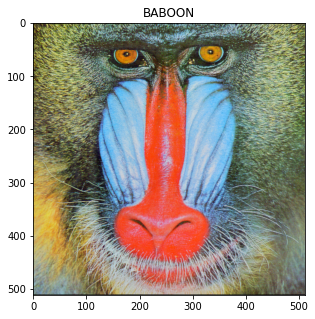

In [37]:
animal =  cv2.imread("baboon.png")
plt.figure(figsize= (5,5))
plt.title('BABOON')
plt.imshow(cv2.cvtColor(animal, cv2.COLOR_RGB2BGR))
plt.show()

**Plotting Histogram**

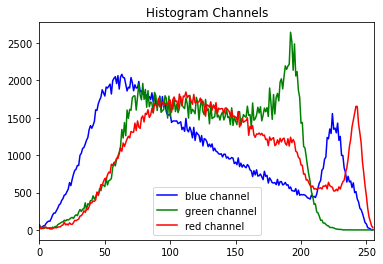

In [38]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([animal],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

**Image Negatives**

In [39]:
neg_toy_image = -1 * test_image + 255

print("toy image\n", test_image)
print("image negatives\n", neg_toy_image)

toy image
 [[0 2 2]
 [1 1 1]
 [1 1 2]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


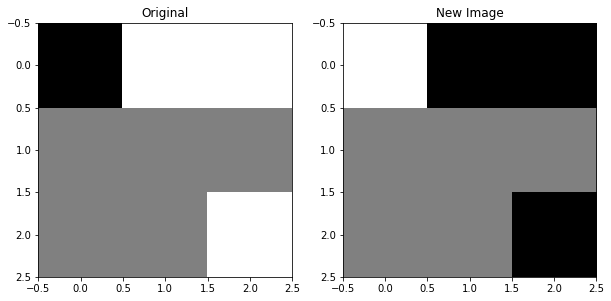

In [40]:
plot_image(test_iamge, neg_toy_image)

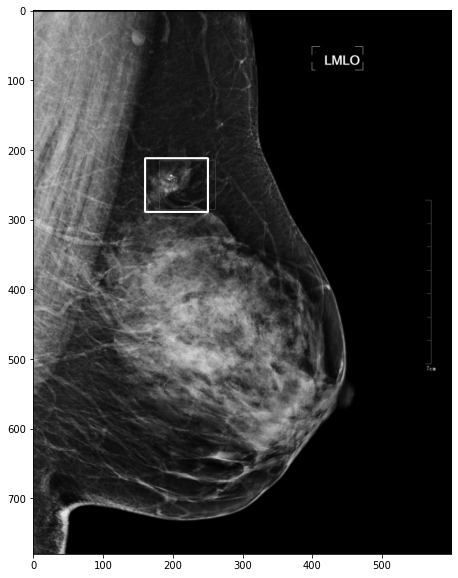

In [41]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2) 

plt.figure(figsize = (10,10))
plt.imshow(image, cmap="gray")
plt.show()

In [42]:
img_neg = -1 * image + 255

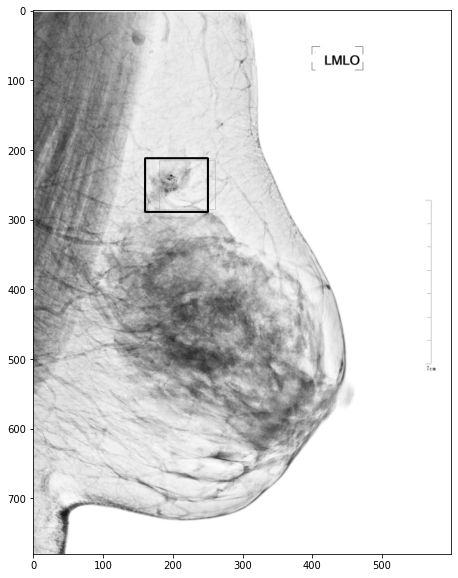

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap = "gray")
plt.show()

# **Brightness And Contrast Arrangements**

In [45]:
alpha = 1 
beta = 100   
image = cv2.imread('goldhill.bmp', cv2.IMREAD_GRAYSCALE)
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

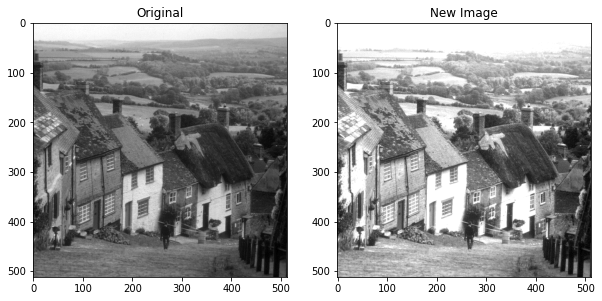

In [46]:
plot_image(image, new_image)

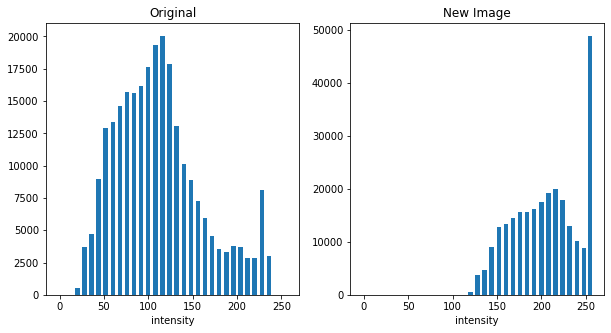

In [52]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image)

In [53]:
plt.figure(figsize=(10,5))
alpha = 2
beta = 0 
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

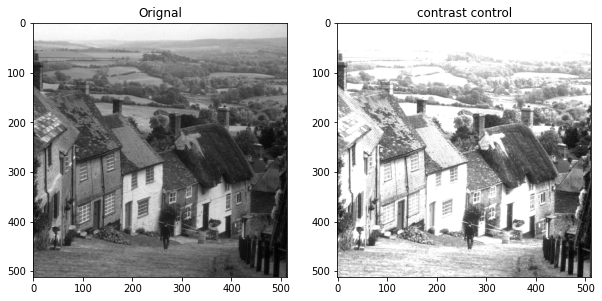

In [55]:
plot_image(image,new_image,"Orignal","contrast control")

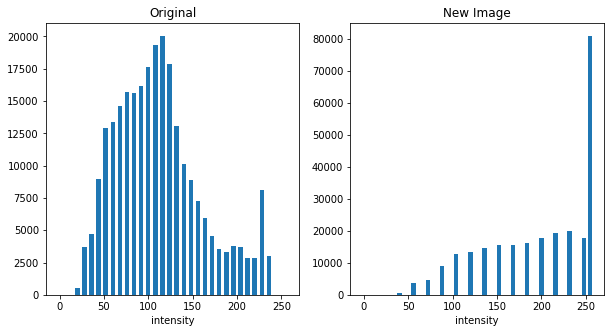

In [56]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image)

In [57]:
plt.figure(figsize=(10,5))
alpha = 3 
beta = -200    
new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

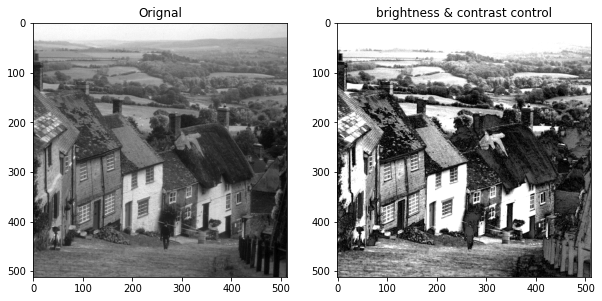

In [59]:
plot_image(image, new_image, "Orignal", "brightness & contrast control")

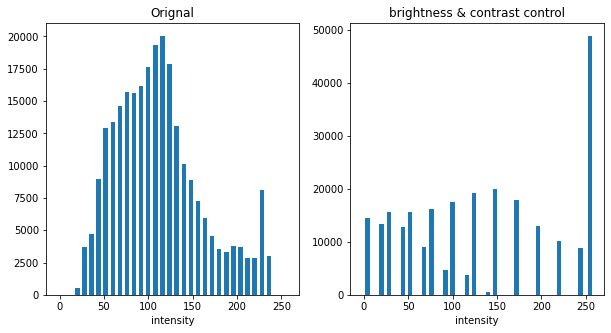

In [61]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "brightness & contrast control")

**Histogram Equalization**

In [62]:
zelda = cv2.imread("zelda.png",cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

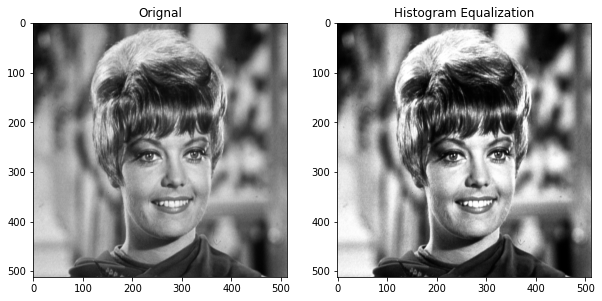

In [63]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

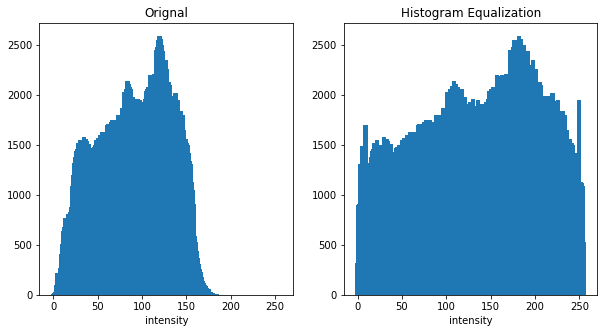

In [64]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image,"Orignal","Histogram Equalization")

## Thresholding and Simple Segmentation


In [65]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out                             

In [66]:
test_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [67]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(test_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

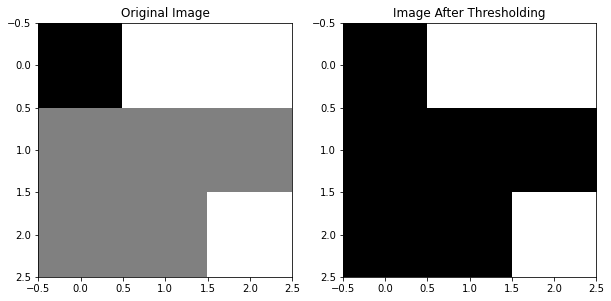

In [69]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

**Considering with an Image**

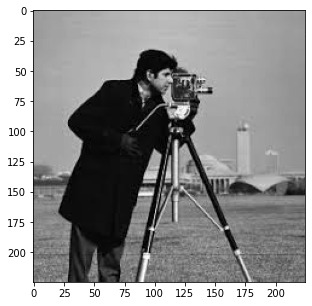

In [72]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.show()

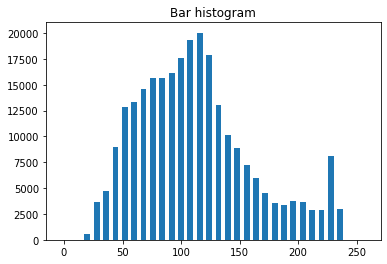

In [74]:
image = cv2.imread('goldhill.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [75]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

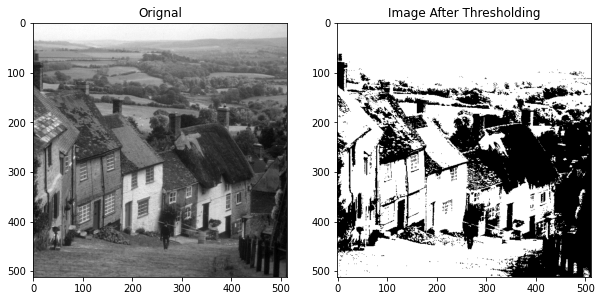

In [76]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

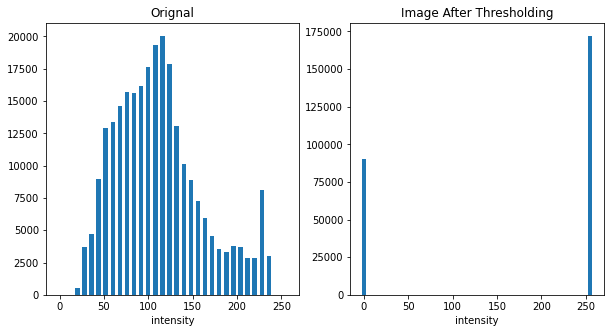

In [77]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

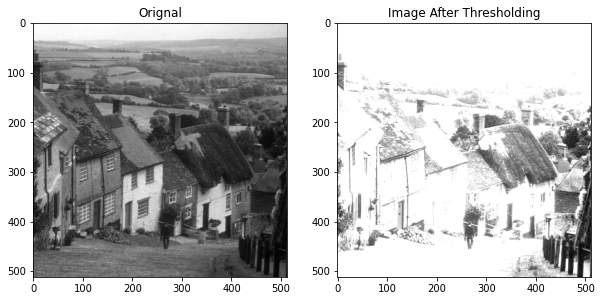

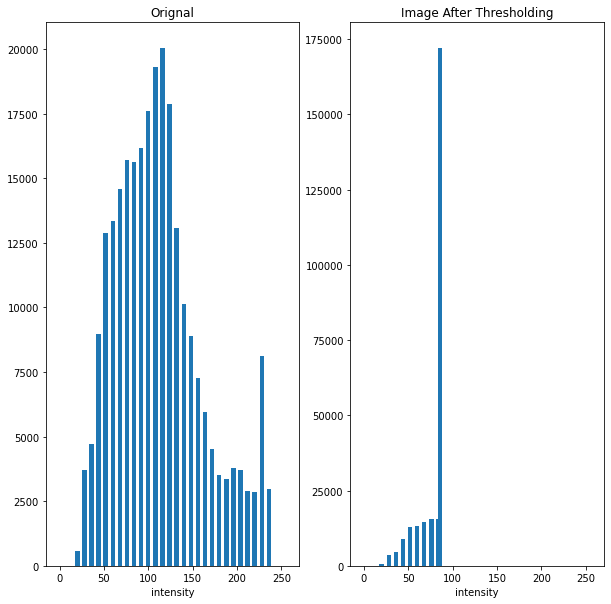

In [78]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plt.figure(figsize=(10,10))
plot_hist(image, new_image,"Orignal","Image After Thresholding")

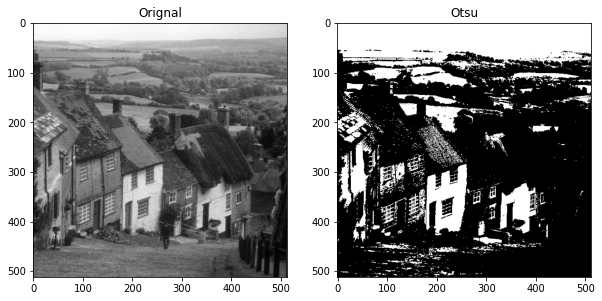

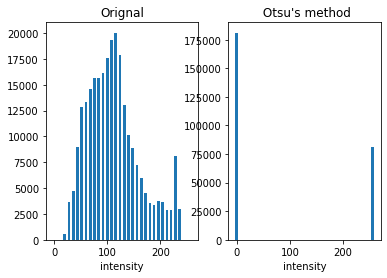

In [79]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

In [80]:
ret

124.0

**Completed**